<a href="https://colab.research.google.com/github/abdurrahman720/python_ml/blob/main/ml_project_02_spam_mail_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Mail Detection (Supervised Algorithm)

**Steps:**


1.   Collect Mail dataset
2.   Data Preprocessing (handling missing values, label encoding, handling imbalanced data etc)
3.   Data Standardize (can be done after train test split)
4.   Train Test Split
5.   Train the Model (Here 'Logistic Regression Model')
*Logistic Regression Model is suitable for binary classification problem such as finding the target just 0 or 1 (0 is spam, 1 is ham)*
6. We will check the accuracy score also


---




imporitng depedency and dataset

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [107]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Analyzing the Data**

check the shape and if there is any null value

In [108]:
raw_mail_data.shape

(5572, 2)

In [109]:
raw_mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [110]:
#though there is no null values, we are replacing these values with empty string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Checking if dataset is imbalanced.

here, our target column is Category

In [111]:
mail_data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

Here, the data numbers of ham is too much greater than spam.

We can check with graphical view using seaborn

<Axes: xlabel='Category', ylabel='count'>

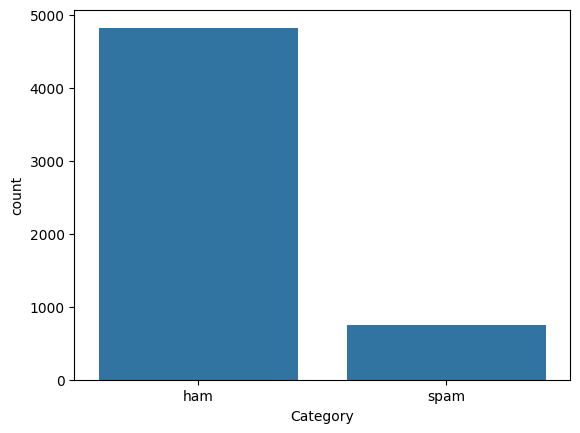

In [112]:
sns.countplot(x='Category', data=mail_data)

**Let's encode the labeling before balance the dataset for spam data**

In [113]:
mail_data.loc[mail_data['Category']=='spam','Category',] = 0
mail_data.loc[mail_data['Category']=='ham','Category',] = 1

In [114]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


Balancing the dataset

In [115]:
spam = mail_data[mail_data.Category==0]
ham_old =  mail_data[mail_data.Category==1]

print(spam.shape)
print(ham_old.shape)

(747, 2)
(4825, 2)


In [116]:
ham = ham_old.sample(n=747)
ham.shape

(747, 2)

In [117]:
new_mail_data = pd.concat([spam, ham],axis=0)

In [118]:
new_mail_data['Category'].value_counts()

0    747
1    747
Name: Category, dtype: int64

Splitting the train and test data

In [119]:
X = new_mail_data['Message']
Y = new_mail_data['Category']

print(X)
print(Y)

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
508     You should know now. So how's anthony. Are you...
3356                        Minimum walk is 3miles a day.
3058    Just woke up. Yeesh its late. But I didn't fal...
1966    Thanks. It was only from tescos but quite nice...
5179    Hi hope u r both ok, he said he would text and...
Name: Message, Length: 1494, dtype: object
2       0
5       0
8       0
9       0
11      0
       ..
508     1
3356    1
3058    1
1966    1
5179    1
Name: Category, Length: 1494, dtype: object


**Train Test Split**

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=3)

**Processing Train Text with Feature Extraction**

In [121]:
#transforming text data into feature vectors that can be used as input to feed the logistic regression

feature_extraction = TfidfVectorizer(max_df=1, stop_words='english', lowercase=True)

X_train_extracted = feature_extraction.fit_transform(X_train)
X_test_extracted = feature_extraction.transform(X_test)

#convert Y_train and Y_test values into int
Y_train = Y_train.astype('int')
Y_test  = Y_test.astype('int')

**Train the model**

In [122]:
model  = LogisticRegression()

In [123]:
model.fit(X_train_extracted, Y_train)

LogisticRegression()

**Model Evaluation**

In [124]:
#train data score evaluation
train_data_prediction = model.predict(X_train_extracted)
train_data_accuracy = accuracy_score(train_data_prediction, Y_train)
print("Accuracy of training data",train_data_accuracy)

#test data score evaluation

test_data_prediction = model.predict(X_test_extracted)
test_data_accuracy = accuracy_score(test_data_prediction, Y_test)
print("Accuracy of test data",test_data_accuracy)

Accuracy of training data 0.8266369047619048
Accuracy of test data 0.6933333333333334


**Building a Predictive System**

In [126]:

input_mail = ["URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]

#convert text into feature vector
input_mail_extracted  = feature_extraction.transform(input_mail)

#prediction
prediction = model.predict(input_mail_extracted)

if(prediction==0):
  print('This is a spam mail')
else:
    print('This is not spam!')



This is a spam mail


**Comment:**
*The accuracy of both train and test data decreased since the dataset has been balanced through under sampling. It reduced the number of training data.
Accuracy rate can be increased if larger Dataset is used*
